# OpenCV face extraction

https://docs.opencv.org/4.x/db/d28/tutorial_cascade_classifier.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

In [2]:
import numpy as np
np.__version__

'1.22.3'

In [3]:
import cv2 as cv
cv.__version__

'4.6.0'

In [4]:
!ls -l ../../data/people/

total 9904
-rw-r--r-- 1 olli olli  792986 Jul  7 11:02 body-vs-soul-meyer.jpg
-rw-r--r-- 1 olli olli  279121 Jul  7 11:02 gay-or-not.jpeg
-rw-r--r-- 1 olli olli  654048 May 13 10:13 olli1.jpg
-rw-r--r-- 1 olli olli 1319292 Jul  7 11:02 olli2.jpg
-rw-r--r-- 1 olli olli  103190 Jul  7 11:02 olli3.jpg
-rw-r--r-- 1 olli olli 6977350 May 13 10:07 olli4.jpg


In [5]:
img = cv.imread('../../data/people/olli1.jpg')
# img = cv.imread('../../data/people/olli2.jpg')
# img = cv.imread('../../data/people/olli3.jpg')
img = cv.imread('../../data/people/olli4.jpg')

# img = cv.imread('../../data/people/gay-or-not.jpeg')

# img = cv.imread('../../data/people/body-vs-soul-meyer.jpg')

In [6]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_rgb.shape

(5632, 4224, 3)

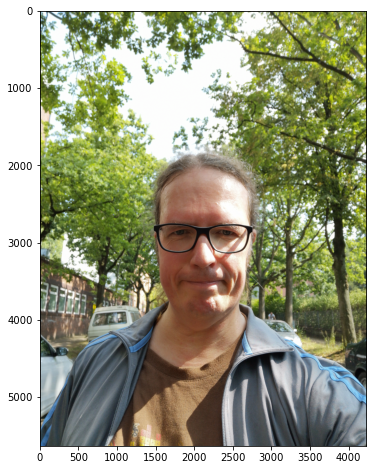

In [7]:
plt.imshow(img_rgb);

135.80925248411404

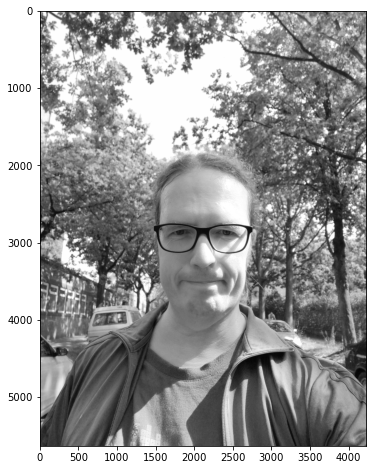

In [8]:
img_r = img_rgb[:, :, 0]
plt.imshow(img_r, cmap='gray');
img_r.mean()

138.4740801934697

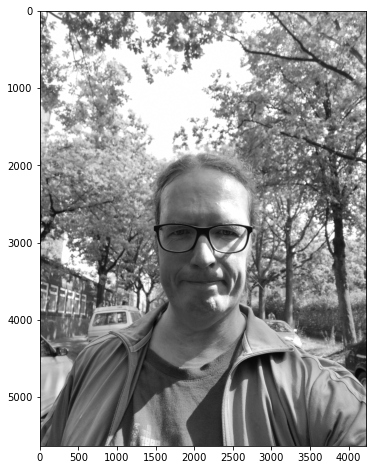

In [9]:
img_g = img_rgb[:, :, 1]
plt.imshow(img_g, cmap='gray');
img_g.mean()

107.37862259625732

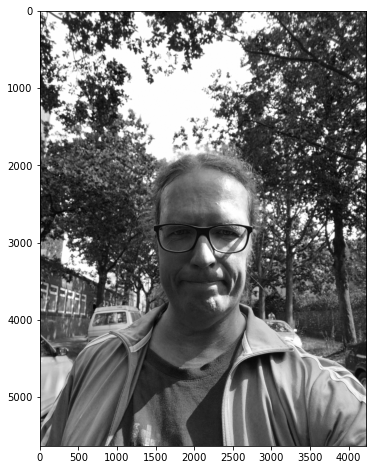

In [10]:
img_b = img_rgb[:, :, 2]
plt.imshow(img_b, cmap='gray');
img_b.mean()

In [11]:
# cv.equalizeHist?

In [12]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# normalizes the brightness and increases the contrast of the image
img_gray = cv.equalizeHist(img_gray)
img_gray.shape

(5632, 4224)

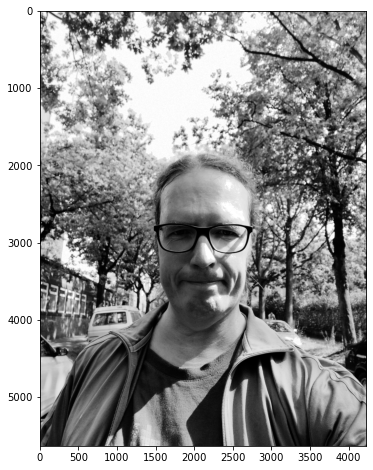

In [13]:
plt.imshow(img_gray, cmap='gray');

In [14]:
# cv.rectangle?

In [15]:
# cv.ellipse?

In [16]:
img_height, img_width = img_gray.shape
img_height, img_width

(5632, 4224)

In [17]:
min_face_height = round(img_height * .1)
min_face_width = round(img_width * .1)
min_face_height, min_face_width

(563, 422)

In [18]:
# faceCascade.detectMultiScale?

In [19]:
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
        img_gray,
        minSize=(min_face_height, min_face_width)
) 
faces

array([[1315, 2301, 1568, 1568]], dtype=int32)

In [20]:
# we assume a single face
largest_index = faces[:, 3].argmax()
face = faces[largest_index]
x, y, w, h = face
face

array([1315, 2301, 1568, 1568], dtype=int32)

In [25]:
color = (255, 0, 255)
thickness = 20

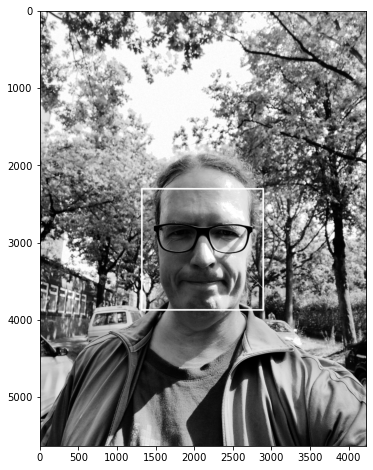

In [26]:
frame_gray = img_gray.copy()

center = (x + w//2, y + h//2)
# frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, color, thickness)
pt1 = (x, y)
pt2 = (x + w, y + h)
cv.rectangle(frame_gray, pt1, pt2, color, thickness)
plt.imshow(frame_gray, cmap='gray');    

(1568, 1568)

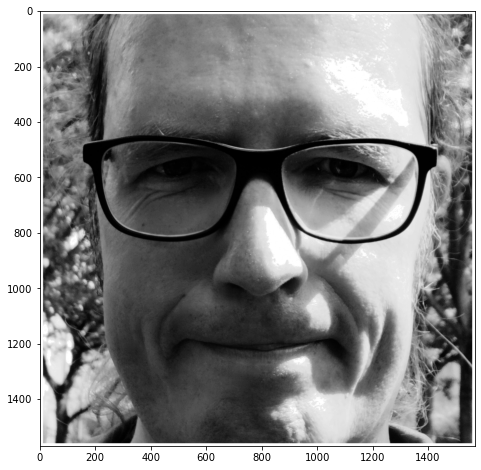

In [29]:
roi = frame_gray[y:y+h,x:x+w]
plt.imshow(roi, cmap='gray');
roi.shape

In [28]:
cv.imwrite('detection.jpg', cv.cvtColor(roi, cv.COLOR_RGB2BGR))

True